<a href="https://colab.research.google.com/github/Iam-whizzy/DataScience/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# Computer vision: Artificial Intelligence where machines can classify an image
# Convolutional Layers: Image Processing
# ANN
# Dataset: Cifar10 ->

In [101]:
from keras import datasets, layers, models
import tensorflow as tf

In [102]:
# Load Cifar10 Dataset (Images with their labels)
# 32 x 32 pixel, colored/grey_scale
# 32 x 32 -> 784 pixels
# 16 x 16 -> 256 (0-255 maximum)
(training_images, training_labels), (testing_images, testing_labels) = tf.keras.datasets.cifar10.load_data()

In [103]:
# Image Pre Processing
training_images, testing_images = training_images/255, testing_images/255

In [104]:
# Determine the labels and store them in a list
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", " Truck"]

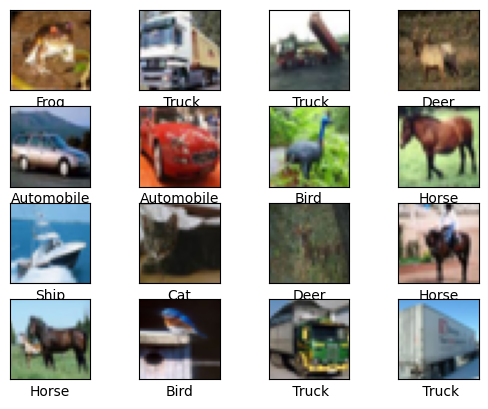

In [105]:
# Visualize Sample Images
# Subplot can draw other many plots
import matplotlib.pyplot as plt
for i in range(16):
      plt.subplot(4,4, i+ 1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(training_images[i], cmap = plt.cm.binary)
      plt.xlabel(class_names[training_labels[i][0]])
plt.show()

In [106]:
# Total Images and labels -> 60,000
# Training -> 20,000
# Testing -> 4000

training_images = training_images[:20000]
training_labels = training_labels[:20000]


testing_images= testing_images[:4000]
testing_labels = testing_labels[:4000]

In [108]:
# Convolutional Layer
model = models.Sequential()

# Input Layer -> Images
# 3, 3 matrix is kernel size - used to extract a feature
# 3 for RGB
# Feature Extraction
# Maximum Pooling
# model.add(layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (16,16, 3)))
# model.add(layers.MaxPool2D(2,2))

# Hidden Layers
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32, 3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(2,2))

# Flattening
# 16x16 -> 256 neurons
model.add(layers.Flatten())


In [109]:
# ANN Layers -> Dense -> 32
# Decided to use 64 later

model.add(layers.Dense(64, activation = 'relu'))

# Output Layer
# Sigmoid -> One Output
# Softmax -> 10

model.add(layers.Dense(64, activation = 'softmax'))


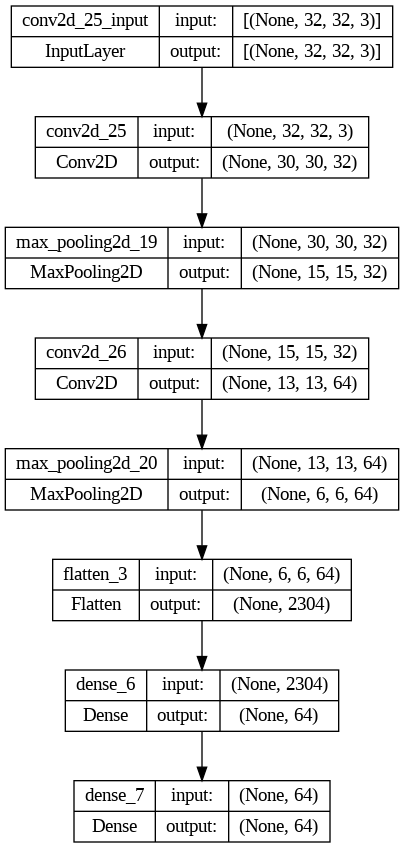

In [110]:
from keras.utils import plot_model
plot_model(model, to_file='ann_model.png', show_shapes=True)

In [111]:
# Adam - reduce loss and increase accuracy
model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [112]:
# Fit the training images and labels
# Batch size if not specified it takes the default 32
# Read about Early Stopping -> used to utilise the resources
# Overfitting

model.fit(training_images, training_labels, epochs = 10)

Epoch 1/10
625/625 [==============================] - 28s 43ms/step - loss: 1.7932 - accuracy: 0.3564
Epoch 2/10
625/625 [==============================] - 24s 39ms/step - loss: 1.4044 - accuracy: 0.4985
Epoch 3/10
625/625 [==============================] - 24s 38ms/step - loss: 1.2434 - accuracy: 0.5605
Epoch 4/10
625/625 [==============================] - 23s 36ms/step - loss: 1.1244 - accuracy: 0.6053
Epoch 5/10
625/625 [==============================] - 24s 39ms/step - loss: 1.0330 - accuracy: 0.6441
Epoch 6/10
625/625 [==============================] - 24s 39ms/step - loss: 0.9595 - accuracy: 0.6667
Epoch 7/10
625/625 [==============================] - 24s 38ms/step - loss: 0.9026 - accuracy: 0.6906
Epoch 8/10
625/625 [==============================] - 24s 38ms/step - loss: 0.8423 - accuracy: 0.7088
Epoch 9/10
625/625 [==============================] - 24s 39ms/step - loss: 0.7902 - accuracy: 0.7258
Epoch 10/10
625/625 [==============================] - 23s 36ms/step - loss: 0.745

In [113]:
# Model Evaluation
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"The accuracy is {accuracy} and loss is at {loss}")

125/125 [==============================] - 2s 11ms/step - loss: 1.0723 - accuracy: 0.6528
The accuracy is 0.6527500152587891 and loss is at 1.0722614526748657


In [114]:
# Saving the model
model.save('image_classifier.models')

In [ ]:
# Model Prediction
# Have the image in colab Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

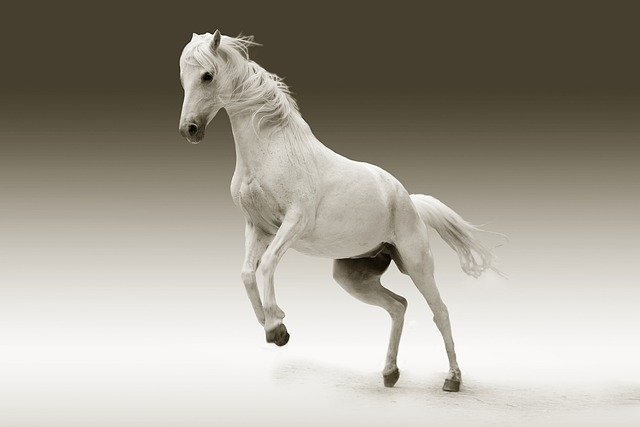

In [139]:
# Display the image

import glob
from IPython.display import Image, display
for image in glob.glob("/content/horse2.jpg"):
  display(Image(filename = image))


In [140]:
from tensorflow.keras.utils import load_img, img_to_array

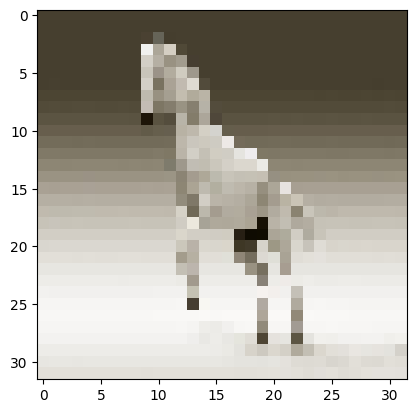

In [141]:
image_path = '/content/horse2.jpg'
image = load_img(image_path, target_size = (32, 32, 3))

converted_image = img_to_array(image)
converted_image_pixels = converted_image/255
converted_reshaped = converted_image_pixels.reshape(32, 32, 3)

plt.imshow(converted_reshaped, cmap = plt.cm.binary)


In [142]:
import numpy as np
prediction = model.predict(np.array([converted_reshaped]))
print(prediction)

1/1 [==============================] - 0s 24ms/step
[[1.51833380e-02 7.27006758e-04 7.32209742e-01 4.52037640e-02
  5.72278127e-02 6.13283664e-02 7.63211474e-02 1.15822786e-02
  5.09046586e-05 1.65572055e-04 1.14540444e-09 2.82947277e-10
  2.98330076e-11 2.04484582e-10 6.10736739e-10 1.84173496e-10
  1.78615478e-09 2.11925703e-11 1.76530429e-10 7.97280020e-11
  8.17900081e-10 8.84301854e-10 8.79819412e-11 7.90653598e-10
  1.44962556e-10 2.01028874e-10 1.41757467e-10 1.01801498e-10
  7.40853646e-12 1.04313488e-10 2.53438981e-09 4.03726219e-10
  4.32921921e-10 3.42287398e-09 8.69007644e-10 3.46490503e-10
  1.75442841e-10 3.15598742e-10 3.45656170e-10 1.07554979e-10
  1.79702725e-10 7.15419901e-09 3.84327636e-09 2.06299561e-10
  8.84308626e-10 9.11454245e-10 2.99095942e-10 1.59121660e-09
  9.20774013e-11 4.63285729e-11 7.39532532e-11 1.65273617e-09
  7.49421947e-09 3.68368253e-10 3.65499520e-10 4.10486228e-10
  8.25237934e-11 6.35087849e-09 1.69098360e-10 6.24758956e-09
  1.50116031e-10 2

In [143]:
index = np.argmax(prediction)
print(f"THE MODEL PREDICTED :{class_names[index]}")

THE MODEL PREDICTED :Bird
